In [20]:
# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage.transform import resize
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers

In [21]:
ROOT_PATH = os.getcwd()
training_data_directory = os.path.join(ROOT_PATH + "/TrainingData/")
testing_data_directory = os.path.join(ROOT_PATH + "/TestingData/")
class_names = ['Cat', 'Dog']
img_rows, img_cols = 50, 50

In [22]:
def load_data(data_directory):
    
    data = os.listdir(data_directory)
        
    labels = []
    images = []
    
    data.pop(0)
    for image in data:
        label = ''
        #resize images and load logic
        image_resize = resize(skimage.data.imread(data_directory + image), (img_rows, img_cols), anti_aliasing=True)
        images.append(image_resize)
        for char in image:
            if char == '.':
                break
            label += char
        if label == 'cat':
            labels.append(0)
        else:
            labels.append(1)
    return images, labels

(train_images, train_labels) = load_data(training_data_directory)
(test_images, test_labels) = load_data(testing_data_directory)
trainImagesArray = np.array(train_images)
trainLabelsArray = np.array(train_labels)
testImagesArray = np.array(test_images)
testLabelsArray = np.array(test_labels)


/Users/mangalakhandekar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [23]:
trainImagesArray.shape


(2002, 50, 50, 3)

In [24]:
len(trainLabelsArray)

2002

In [25]:
testImagesArray.shape

(497, 50, 50, 3)

In [26]:
len(testLabelsArray)

497

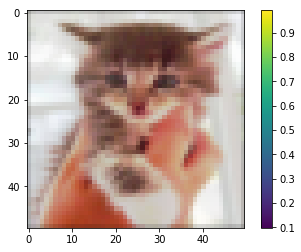

In [27]:
# Check the scale for one of the training images
plt.figure()
plt.imshow(trainImagesArray[3])
plt.colorbar()
plt.grid(False)

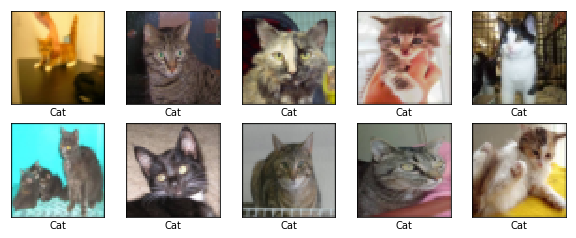

In [28]:
# Plotted few training samples for cat
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImagesArray[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabelsArray[i]])

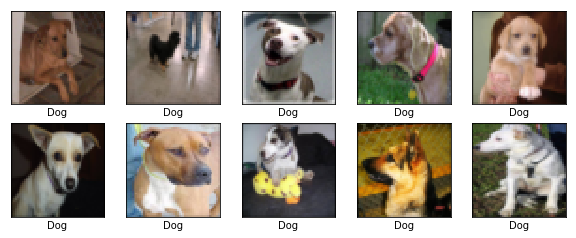

In [29]:
# Plotted few training samples for dog

plt.figure(figsize=(10,10))
dogIndex = 1004
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImagesArray[dogIndex], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabelsArray[dogIndex]])
    dogIndex = dogIndex + 1

In [30]:
#Reshaping
trainImagesArray = trainImagesArray.reshape(-1, img_rows, img_cols, 3)
testImagesArray = testImagesArray.reshape(-1, img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)
    
trainImagesArray = trainImagesArray.astype('float32')
testImagesArray = testImagesArray.astype('float32')

In [32]:
# Build a Convolutional Neural Network

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training images and their associated training labels
model.fit(trainImagesArray, trainLabelsArray,
          batch_size=200,
          epochs=5,
          verbose=1,
          validation_data=(testImagesArray, testLabelsArray))

Train on 2002 samples, validate on 497 samples
Epoch 1/5
2002/2002 [==============================] - 109s 54ms/step - loss: 0.8549 - acc: 0.5035 - val_loss: 0.6928 - val_acc: 0.5030
Epoch 2/5
2002/2002 [==============================] - 108s 54ms/step - loss: 0.6916 - acc: 0.5025 - val_loss: 0.6934 - val_acc: 0.4990
Epoch 3/5
2002/2002 [==============================] - 111s 55ms/step - loss: 0.6883 - acc: 0.5295 - val_loss: 0.6868 - val_acc: 0.5252
Epoch 4/5
2002/2002 [==============================] - 111s 55ms/step - loss: 0.6823 - acc: 0.5559 - val_loss: 0.6816 - val_acc: 0.5815
Epoch 5/5
2002/2002 [==============================] - 106s 53ms/step - loss: 0.6674 - acc: 0.5864 - val_loss: 0.6758 - val_acc: 0.5694


In [33]:
# Test the accuracy by evaluating the model for test images and test labels
test_loss, test_acc = model.evaluate(testImagesArray, testLabelsArray)
print('Test accuracy:', test_acc)

497/497 [==============================] - 8s 17ms/step
Test accuracy: 0.569416499023946


In [34]:
# Predict the class associated with every test image
predictions = model.predict(testImagesArray)

In [35]:
# Example
predictions[17]

array([0.55586416, 0.44413587], dtype=float32)

In [36]:
np.argmax(predictions[17])

0

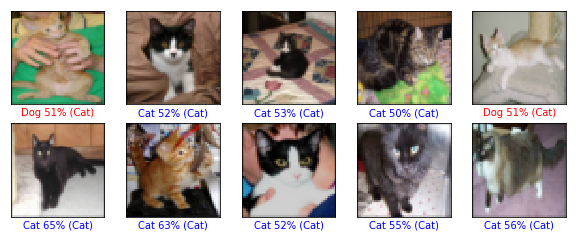

In [37]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Plot predictions for cat images
plt.figure(figsize=(10,10))
for i in range(0, 10):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions, testLabelsArray, testImagesArray)


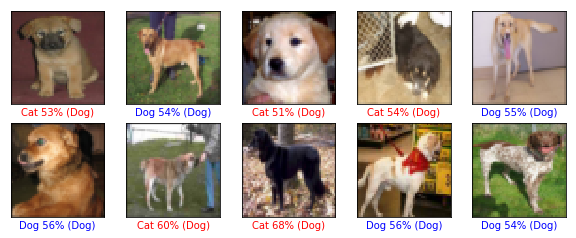

In [40]:
#Plot predictions for dog images
start = 250
plt.figure(figsize=(10,10))
for i in range(0, 10):
    plt.subplot(5,5,i+1)
    plot_image(start, predictions, testLabelsArray, testImagesArray)
    start = start + 1